In [1]:
import sys
import os
import subprocess

from six import string_types

# Make sure you have all of these packages installed, e.g. via pip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
import cv2
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras import regularizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
PLANET_KAGGLE_ROOT = os.path.abspath("/Users/sunchenxi/Desktop/lab/kaggle/amazon/")
PLANET_KAGGLE_JPEG_DIR = os.path.join(PLANET_KAGGLE_ROOT, 'train-jpg')
PLANET_KAGGLE_LABEL_CSV = os.path.join(PLANET_KAGGLE_ROOT, 'train_v2.csv')
assert os.path.exists(PLANET_KAGGLE_ROOT)
assert os.path.exists(PLANET_KAGGLE_JPEG_DIR)
assert os.path.exists(PLANET_KAGGLE_LABEL_CSV)

In [3]:
#读取train set标签
labels_df = pd.read_csv(PLANET_KAGGLE_LABEL_CSV)
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)

In [4]:
#获取含有tags标签的n张图片
def sample_images(tags, n=None):
    """Randomly sample n images with the specified tags."""
    condition = True
    if isinstance(tags, string_types): #tag是否是string类型
        raise ValueError("Pass a list of tags, not a single tag.")
    for tag in tags:
        condition = condition & labels_df[tag] == 1
    if n is not None:
        return labels_df[condition].sample(n)
    else:
        return labels_df[condition]
def load_image(filename):
    '''Look through the directory tree to find the image you specified
    (e.g. train_10.tif vs. train_10.jpg)'''
    for dirname in os.listdir(PLANET_KAGGLE_ROOT):
        path = os.path.abspath(os.path.join(PLANET_KAGGLE_ROOT, dirname, filename))
        if os.path.exists(path):
            print('Found image {}'.format(path))
            return io.imread(path)
    print('Load failed: could not find image {}'.format(path))
 
 #将图片在数组中的位置变成名称
def sample_to_fname(sample_df, row_idx, suffix='jpg'):
    '''Given a dataframe of sampled images, get the
    corresponding filename.'''
    fname = sample_df.get_value(sample_df.index[row_idx], 'image_name')
    return '{}.{}'.format(fname, suffix)

## primary 图片名

In [5]:
n=0
for i in range(len(labels_df)):
    if(labels_df['primary'][i]==1):
        n=n+1
fname=[0]*n
s = sample_images(['primary'], n=n)
for i in range(n):
    fname[i]= sample_to_fname(s, i)#获得了文件名
fname

['train_22467.jpg',
 'train_4090.jpg',
 'train_13985.jpg',
 'train_32587.jpg',
 'train_16569.jpg',
 'train_17616.jpg',
 'train_6514.jpg',
 'train_20920.jpg',
 'train_13505.jpg',
 'train_21211.jpg',
 'train_4252.jpg',
 'train_25124.jpg',
 'train_17106.jpg',
 'train_4807.jpg',
 'train_28343.jpg',
 'train_32475.jpg',
 'train_5927.jpg',
 'train_18098.jpg',
 'train_15013.jpg',
 'train_18597.jpg',
 'train_33738.jpg',
 'train_4925.jpg',
 'train_20124.jpg',
 'train_14419.jpg',
 'train_2026.jpg',
 'train_2369.jpg',
 'train_31411.jpg',
 'train_6586.jpg',
 'train_30133.jpg',
 'train_628.jpg',
 'train_22755.jpg',
 'train_23795.jpg',
 'train_28528.jpg',
 'train_29279.jpg',
 'train_35033.jpg',
 'train_5026.jpg',
 'train_4170.jpg',
 'train_10970.jpg',
 'train_16591.jpg',
 'train_14590.jpg',
 'train_26393.jpg',
 'train_12769.jpg',
 'train_35282.jpg',
 'train_14023.jpg',
 'train_29607.jpg',
 'train_20378.jpg',
 'train_8461.jpg',
 'train_37145.jpg',
 'train_30409.jpg',
 'train_32400.jpg',
 'train_11846.

## agriculture图片名

In [6]:
n1=0
for i in range(len(labels_df)):
    if(labels_df['agriculture'][i]==1):
        n1=n1+1
fname1=[0]*n1
s1 = sample_images(['agriculture'], n=n1)
for i in range(n1):
    fname1[i]= sample_to_fname(s1, i)#获得了文件名
fname1

['train_8364.jpg',
 'train_10076.jpg',
 'train_38060.jpg',
 'train_27308.jpg',
 'train_29954.jpg',
 'train_12319.jpg',
 'train_38771.jpg',
 'train_3177.jpg',
 'train_33545.jpg',
 'train_22085.jpg',
 'train_17641.jpg',
 'train_36966.jpg',
 'train_610.jpg',
 'train_32306.jpg',
 'train_991.jpg',
 'train_12348.jpg',
 'train_172.jpg',
 'train_27065.jpg',
 'train_12312.jpg',
 'train_18204.jpg',
 'train_477.jpg',
 'train_15661.jpg',
 'train_27234.jpg',
 'train_36000.jpg',
 'train_4339.jpg',
 'train_1423.jpg',
 'train_15721.jpg',
 'train_31100.jpg',
 'train_16574.jpg',
 'train_8073.jpg',
 'train_27220.jpg',
 'train_26050.jpg',
 'train_35376.jpg',
 'train_30635.jpg',
 'train_39125.jpg',
 'train_13673.jpg',
 'train_16092.jpg',
 'train_9782.jpg',
 'train_19980.jpg',
 'train_35130.jpg',
 'train_27445.jpg',
 'train_12977.jpg',
 'train_20560.jpg',
 'train_29377.jpg',
 'train_21372.jpg',
 'train_36441.jpg',
 'train_22745.jpg',
 'train_8388.jpg',
 'train_16462.jpg',
 'train_12224.jpg',
 'train_37363.j

## water图片名

In [7]:
n2=0
for i in range(len(labels_df)):
    if(labels_df['water'][i]==1):
        n2=n2+1
fname2=[0]*n2
s2 = sample_images(['water'], n=n2)
for i in range(n2):
    fname2[i]= sample_to_fname(s2, i)#获得了文件名
fname2

['train_36093.jpg',
 'train_36274.jpg',
 'train_36558.jpg',
 'train_39173.jpg',
 'train_37890.jpg',
 'train_5666.jpg',
 'train_29688.jpg',
 'train_324.jpg',
 'train_35358.jpg',
 'train_23186.jpg',
 'train_25669.jpg',
 'train_36785.jpg',
 'train_3636.jpg',
 'train_11855.jpg',
 'train_2203.jpg',
 'train_1465.jpg',
 'train_30970.jpg',
 'train_29984.jpg',
 'train_10257.jpg',
 'train_23776.jpg',
 'train_22553.jpg',
 'train_23906.jpg',
 'train_16845.jpg',
 'train_25764.jpg',
 'train_15275.jpg',
 'train_15861.jpg',
 'train_28585.jpg',
 'train_9402.jpg',
 'train_2995.jpg',
 'train_38045.jpg',
 'train_20639.jpg',
 'train_14601.jpg',
 'train_18528.jpg',
 'train_28439.jpg',
 'train_12516.jpg',
 'train_31438.jpg',
 'train_8415.jpg',
 'train_19692.jpg',
 'train_12150.jpg',
 'train_27401.jpg',
 'train_12918.jpg',
 'train_18589.jpg',
 'train_9528.jpg',
 'train_11576.jpg',
 'train_6797.jpg',
 'train_5524.jpg',
 'train_2986.jpg',
 'train_25303.jpg',
 'train_11680.jpg',
 'train_27469.jpg',
 'train_16864

## cultivation图片名

In [8]:
n3=0
for i in range(len(labels_df)):
    if(labels_df['cultivation'][i]==1):
        n3=n3+1
fname3=[0]*n3
s3 = sample_images(['cultivation'], n=n3)
for i in range(n3):
    fname3[i]= sample_to_fname(s3, i)#获得了文件名
fname3

['train_31492.jpg',
 'train_15991.jpg',
 'train_39258.jpg',
 'train_30395.jpg',
 'train_19837.jpg',
 'train_37242.jpg',
 'train_34776.jpg',
 'train_6450.jpg',
 'train_11967.jpg',
 'train_13332.jpg',
 'train_26620.jpg',
 'train_35337.jpg',
 'train_1373.jpg',
 'train_11427.jpg',
 'train_9965.jpg',
 'train_21713.jpg',
 'train_31061.jpg',
 'train_9754.jpg',
 'train_33611.jpg',
 'train_26666.jpg',
 'train_26294.jpg',
 'train_38827.jpg',
 'train_23570.jpg',
 'train_20531.jpg',
 'train_38846.jpg',
 'train_31613.jpg',
 'train_13284.jpg',
 'train_35619.jpg',
 'train_13076.jpg',
 'train_9513.jpg',
 'train_27052.jpg',
 'train_35697.jpg',
 'train_1794.jpg',
 'train_13420.jpg',
 'train_39391.jpg',
 'train_8743.jpg',
 'train_32463.jpg',
 'train_9861.jpg',
 'train_32860.jpg',
 'train_22762.jpg',
 'train_24846.jpg',
 'train_17396.jpg',
 'train_13019.jpg',
 'train_38092.jpg',
 'train_4202.jpg',
 'train_35181.jpg',
 'train_3302.jpg',
 'train_17718.jpg',
 'train_2449.jpg',
 'train_17123.jpg',
 'train_389

## habitation图片名

In [9]:
n4=0
for i in range(len(labels_df)):
    if(labels_df['habitation'][i]==1):
        n4=n4+1
fname4=[0]*n4
s4 = sample_images(['habitation'], n=n4)
for i in range(n4):
    fname4[i]= sample_to_fname(s4, i)#获得了文件名
fname4

['train_35248.jpg',
 'train_20653.jpg',
 'train_3280.jpg',
 'train_8743.jpg',
 'train_5655.jpg',
 'train_37998.jpg',
 'train_32716.jpg',
 'train_31715.jpg',
 'train_10708.jpg',
 'train_29177.jpg',
 'train_31118.jpg',
 'train_7110.jpg',
 'train_32021.jpg',
 'train_30820.jpg',
 'train_24340.jpg',
 'train_5356.jpg',
 'train_25120.jpg',
 'train_2425.jpg',
 'train_12898.jpg',
 'train_33196.jpg',
 'train_17391.jpg',
 'train_11041.jpg',
 'train_23804.jpg',
 'train_17117.jpg',
 'train_33215.jpg',
 'train_23521.jpg',
 'train_35937.jpg',
 'train_26967.jpg',
 'train_22046.jpg',
 'train_28327.jpg',
 'train_1995.jpg',
 'train_11555.jpg',
 'train_19798.jpg',
 'train_6669.jpg',
 'train_28321.jpg',
 'train_17905.jpg',
 'train_1755.jpg',
 'train_31235.jpg',
 'train_8589.jpg',
 'train_27441.jpg',
 'train_25507.jpg',
 'train_35780.jpg',
 'train_29328.jpg',
 'train_1594.jpg',
 'train_8632.jpg',
 'train_27607.jpg',
 'train_14285.jpg',
 'train_29855.jpg',
 'train_25607.jpg',
 'train_8353.jpg',
 'train_258.j

In [10]:
n5=0
for i in range(len(labels_df)):
    if(labels_df['road'][i]==1):
        n5=n5+1
fname5=[0]*n5
s5 = sample_images(['road'], n=n5)
for i in range(n5):
    fname5[i]= sample_to_fname(s5, i)#获得了文件名
fname5

['train_27469.jpg',
 'train_8500.jpg',
 'train_20845.jpg',
 'train_16039.jpg',
 'train_30492.jpg',
 'train_39348.jpg',
 'train_37918.jpg',
 'train_9203.jpg',
 'train_23075.jpg',
 'train_14188.jpg',
 'train_12706.jpg',
 'train_2609.jpg',
 'train_30385.jpg',
 'train_14772.jpg',
 'train_21345.jpg',
 'train_19704.jpg',
 'train_14228.jpg',
 'train_14606.jpg',
 'train_21454.jpg',
 'train_21485.jpg',
 'train_36123.jpg',
 'train_15522.jpg',
 'train_38111.jpg',
 'train_25418.jpg',
 'train_20126.jpg',
 'train_1016.jpg',
 'train_3072.jpg',
 'train_30845.jpg',
 'train_40240.jpg',
 'train_2251.jpg',
 'train_11552.jpg',
 'train_27887.jpg',
 'train_16010.jpg',
 'train_16680.jpg',
 'train_5185.jpg',
 'train_36283.jpg',
 'train_28448.jpg',
 'train_22393.jpg',
 'train_14958.jpg',
 'train_25423.jpg',
 'train_16130.jpg',
 'train_14232.jpg',
 'train_19735.jpg',
 'train_28941.jpg',
 'train_27980.jpg',
 'train_12619.jpg',
 'train_13323.jpg',
 'train_5708.jpg',
 'train_24026.jpg',
 'train_25395.jpg',
 'train_

In [11]:
primary_img = [mpimg.imread(PLANET_KAGGLE_ROOT+'/train-jpg/'+ img) for img in fname[:200]]
agriculture_img = [mpimg.imread(PLANET_KAGGLE_ROOT+'/train-jpg/'+ img) for img in fname1[:200]]
water_img = [mpimg.imread(PLANET_KAGGLE_ROOT+'/train-jpg/'+ img) for img in fname2[:200]]
cultivation_img = [mpimg.imread(PLANET_KAGGLE_ROOT+'/train-jpg/'+ img) for img in fname3[:200]]
habitation_img = [mpimg.imread(PLANET_KAGGLE_ROOT+'/train-jpg/'+ img) for img in fname4[:200]]
road_img= [mpimg.imread(PLANET_KAGGLE_ROOT+'/train-jpg/'+ img) for img in fname5[:200]]

In [12]:
land_img=primary_img+agriculture_img+water_img+cultivation_img+habitation_img+road_img

In [13]:
primary_labels=[1,0,0,0,0,0]*200
agriculture_labels=[0,1,0,0,0,0]*200
water_labels=[0,0,1,0,0,0]*200
cultivation_labels=[0,0,0,1,0,0]*200
habitation_labels=[0,0,0,0,1,0]*200
road_labels=[0,0,0,0,0,1]*200
land_labels=primary_labels+agriculture_labels+water_labels+cultivation_labels+habitation_labels+road_labels
land_labels=np.asarray(land_labels).reshape(1200,6)
land_labels

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [14]:
resized_images = [np.reshape(cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA), [1,64,64,4]) for img in land_img]

In [15]:
train_size = int(len(resized_images)*0.9)
train_x = np.vstack(resized_images[:train_size])
test_x = resized_images[train_size:]
train_y = np.vstack(land_labels[:train_size])
test_y = land_labels[train_size:]

In [16]:
op = RMSprop(lr=1e-3)
ob = 'binary_crossentropy'
def Cnet1():
    
    model = Sequential()
    
    model.add(Convolution2D(32, 4, 4, border_mode='same', input_shape=(64, 64, 4), activation='relu'))
    model.add(Convolution2D(32, 4, 4, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Convolution2D(64, 4, 4, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    
    model.add(Convolution2D(128, 4, 4, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    

    model.add(Flatten())
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.3)))
    
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.3)))

    model.add(Dense(6))
    model.add(Activation('softmax'))
    model.compile(loss=ob, optimizer=op, metrics=['accuracy'])
    return model


model = Cnet1()
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history = LossHistory()
model.fit(train_x, train_y, batch_size=32, epochs=10,
          validation_split=0.25, verbose=1, shuffle=True, callbacks=[history])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), padding="same", activation="relu", input_shape=(64, 64, 4...)`
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), padding="same", activation="relu")`
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), padding="same", activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), padding="same", activation="relu")`
  


Train on 810 samples, validate on 270 samples
Epoch 1/10
810/810 [==============================] - 25s - loss: 114.0496 - acc: 0.7453 - val_loss: 69.5215 - val_acc: 0.6667
Epoch 2/10
810/810 [==============================] - 26s - loss: 45.1791 - acc: 0.7490 - val_loss: 26.3894 - val_acc: 0.6667
Epoch 3/10
810/810 [==============================] - 22s - loss: 14.9132 - acc: 0.7547 - val_loss: 5.0735 - val_acc: 0.8333
Epoch 4/10
810/810 [==============================] - 22s - loss: 2.4795 - acc: 0.8300 - val_loss: 1.3531 - val_acc: 0.8333
Epoch 5/10
810/810 [==============================] - 22s - loss: 0.5888 - acc: 0.8325 - val_loss: 0.6843 - val_acc: 0.8333
Epoch 6/10
810/810 [==============================] - 22s - loss: 0.4226 - acc: 0.8333 - val_loss: 0.9991 - val_acc: 0.8333
Epoch 7/10
810/810 [==============================] - 22s - loss: 0.4166 - acc: 0.8333 - val_loss: 0.8017 - val_acc: 0.8333
Epoch 8/10
810/810 [==============================] - 22s - loss: 0.4115 - acc: 

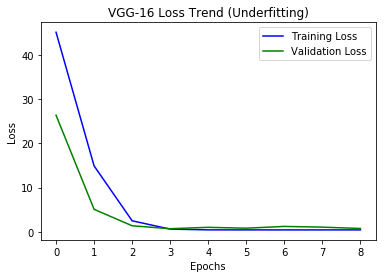

In [19]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend (Underfitting)')
plt.plot(loss[1:], 'blue', label='Training Loss')
plt.plot(val_loss[1:], 'green', label='Validation Loss')
#plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [80]:
num=100

In [81]:
fname3[num]

'train_8202.jpg'

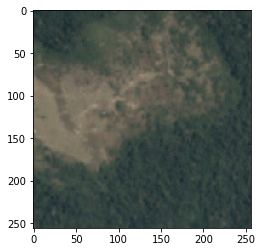

In [82]:
lena = mpimg.imread('/Users/sunchenxi/Desktop/lab/kaggle/amazon/train-jpg/'+fname3[num])
plt.imshow(lena) 

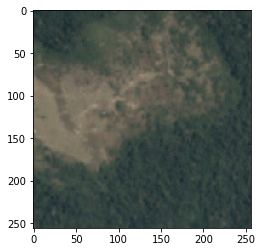

In [83]:
plt.imshow(land_img[num+600])

### land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation','road']

In [84]:
classes = model.predict(resized_images[num+600], batch_size=64)
classes 

array([[ 0.22470374,  0.22385079,  0.24185877,  0.24014227,  0.0453964 ,
         0.02404797]], dtype=float32)

In [85]:
labels_df.values[8202]

array(['train_8202', 'agriculture clear cultivation primary', 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [22]:
op = RMSprop(lr=1e-4)
ob = 'binary_crossentropy'
def Cnet2():
    
    model = Sequential()

    model.add(Convolution2D(32, 4, 4, border_mode='same', input_shape=(64, 64, 4), activation='relu'))
    model.add(Convolution2D(32, 4, 4, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Convolution2D(64, 4, 4, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    
    model.add(Convolution2D(128, 4, 4, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    

    model.add(Flatten())
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.3)))
    
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.3)))

    model.add(Dense(5))
    model.add(Activation('softmax')) #Softmax评分
    model.compile(loss=ob, optimizer=op, metrics=['accuracy'])
    return model


model = Cnet2()
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history = LossHistory()
model.fit(train_x, train_y, batch_size=32, epochs=10,
          validation_split=0.25, verbose=1, shuffle=True, callbacks=[history])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), padding="same", activation="relu", input_shape=(64, 64, 4...)`
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), padding="same", activation="relu")`
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), padding="same", activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), padding="same", activation="relu")`
  


Train on 675 samples, validate on 225 samples
Epoch 1/10
675/675 [==============================] - 19s - loss: 173.2505 - acc: 0.7319 - val_loss: 166.3236 - val_acc: 0.8187
Epoch 2/10
675/675 [==============================] - 18s - loss: 161.6300 - acc: 0.7570 - val_loss: 157.3966 - val_acc: 0.6000
Epoch 3/10
675/675 [==============================] - 18s - loss: 151.7408 - acc: 0.7719 - val_loss: 147.7770 - val_acc: 0.6000
Epoch 4/10
675/675 [==============================] - 18s - loss: 141.9342 - acc: 0.7796 - val_loss: 137.0466 - val_acc: 0.7991
Epoch 5/10
675/675 [==============================] - 18s - loss: 132.2995 - acc: 0.7890 - val_loss: 127.6681 - val_acc: 0.7947
Epoch 6/10
675/675 [==============================] - 18s - loss: 122.9634 - acc: 0.7979 - val_loss: 118.6883 - val_acc: 0.7022
Epoch 7/10
675/675 [==============================] - 18s - loss: 114.0265 - acc: 0.7982 - val_loss: 109.7016 - val_acc: 0.8124
Epoch 8/10
675/675 [==============================] - 18s 

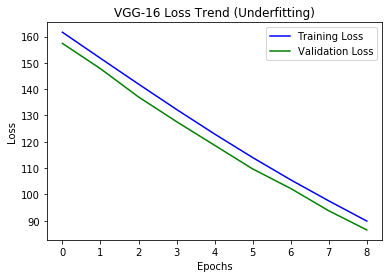

In [24]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend (Underfitting)')
plt.plot(loss[1:], 'blue', label='Training Loss')
plt.plot(val_loss[1:], 'green', label='Validation Loss')
#plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()